# Early Model Testing

In [30]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time

### Load dataset

In [31]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()
original_data.shape

(140350, 445)

## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [32]:
#start_time = '2012-02-01 00:00:00'
start_time = '2014-02-01 00:00:00'
splitting_point = int(0.9 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

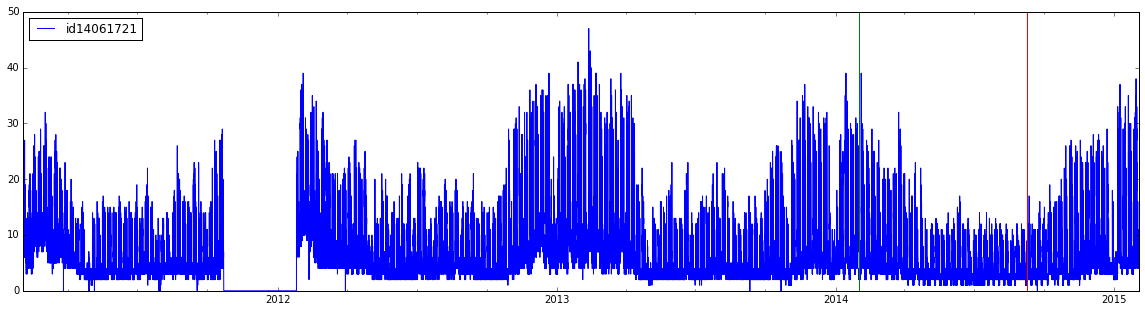

In [33]:
f = original_data[["id14061721"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

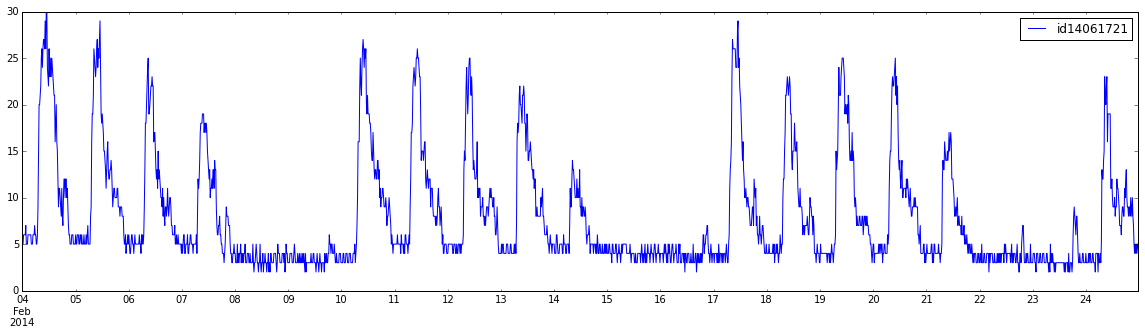

In [34]:
data['2014-02-04':'2014-02-24'][["id14061721"]].plot(figsize=(20,5))  

## Creating Feature Sets

In [35]:
target_col = 'id14061721'

In [36]:
sensor_cols_to_drop = [col for col in list(data) if col.startswith('id') and not col.startswith(target_col)]
#[col for col in list(data) if col not in sensor_cols_to_drop]
data.drop(sensor_cols_to_drop, axis=1, inplace=True)
list(data)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


['id14061721',
 'p',
 't2m_termin',
 'rh_termin',
 'padavine',
 'veter_hitrost',
 'veter_vek_smer',
 'energija_gl',
 'energija_di',
 'HourOfDay',
 'DayOfWeek',
 'Month',
 'Weekday',
 'Weekend',
 'Holiday',
 'DayBeforeHoliday',
 'DayAfterHodliay',
 'BusinessDay',
 'id14061721_roll_mean_1h',
 'id14061721_roll_mean_6h',
 'id14061721_roll_mean_d',
 'id14061721_roll_mean_w',
 'id14061721_roll_mean_m',
 'id14061721_roll_min2_d',
 'id14061721_roll_min2_w',
 'id14061721_roll_max2_d',
 'id14061721_roll_max2_w',
 'id14061721_roll_var_6h',
 'id14061721_roll_var_d',
 'id14061721_roll_var_w',
 'p_roll_mean_1h',
 'p_roll_mean_6h',
 'p_roll_mean_d',
 'p_roll_mean_w',
 'p_roll_mean_m',
 'p_roll_var_1h',
 'p_roll_var_d',
 't2m_termin_roll_mean_1h',
 't2m_termin_roll_mean_6h',
 't2m_termin_roll_mean_d',
 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m',
 't2m_termin_roll_min2_d',
 't2m_termin_roll_min2_w',
 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w',
 't2m_termin_roll_var_1h',
 't2m_termin_r

In [ ]:
columnsToShift = list(data)
shiftedColumns = ["shifted_" + col for col in columnsToShift]

In [38]:
measurements_cols = [col for col in list(data) if col.startswith(target_col)]

wetaher_current_cols =  ['p', 't2m_termin', 'rh_termin', 'padavine', 'veter_hitrost', 'veter_vek_smer', 'energija_gl',
 'energija_di', 'p_roll_mean_1h', 'p_roll_mean_6h', 'p_roll_mean_d', 'p_roll_mean_w', 'p_roll_mean_m', 'p_roll_var_1h',
 'p_roll_var_d', 't2m_termin_roll_mean_1h', 't2m_termin_roll_mean_6h', 't2m_termin_roll_mean_d', 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m', 't2m_termin_roll_min2_d', 't2m_termin_roll_min2_w', 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w', 't2m_termin_roll_var_1h', 't2m_termin_roll_var_d', 'rh_termin_roll_mean_1h',
 'rh_termin_roll_mean_6h', 'rh_termin_roll_mean_d', 'rh_termin_roll_mean_w', 'rh_termin_roll_mean_m',
 'rh_termin_roll_min2_d', 'rh_termin_roll_min2_w', 'rh_termin_roll_max2_d', 'rh_termin_roll_max2_w',
 'rh_termin_roll_var_1h', 'rh_termin_roll_var_d', 'energija_gl_roll_mean_1h', 'energija_gl_roll_mean_6h',
 'energija_gl_roll_mean_d', 'energija_gl_roll_mean_w', 'energija_gl_roll_mean_m', 'energija_gl_roll_var_1h',
 'energija_gl_roll_var_d']

weather_forecasted_cols =  ['shifted_p', 'shifted_t2m_termin', 'shifted_rh_termin', 'shifted_padavine', 
                            'shifted_veter_hitrost', 'shifted_veter_vek_smer', 'shifted_energija_gl']

date_time_cols =  ['shifted_HourOfDay', 'shifted_DayOfWeek', 'shifted_Month', 'shifted_Weekday', 'shifted_Weekend', 
                   'shifted_Holiday', 'shifted_DayBeforeHoliday', 'shifted_DayAfterHodliay', 'shifted_BusinessDay', 
                   'shifted_BusinessDay_sum', 'shifted_Holiday_sum']

In [39]:
all_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols + date_time_cols 
m_wc_wf_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols
m_wc_dt_cols = measurements_cols + wetaher_current_cols + date_time_cols 
m_wf_dt_cols = measurements_cols + weather_forecasted_cols + date_time_cols 
m_dt_cols = measurements_cols + date_time_cols 
m_cols = measurements_cols

## Define Machine Learning Models and Data Sets

In [57]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

## Prediction Results

In [ ]:
validation_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[],[]], names=['model', 'error_metric']))

model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

data_sets = [{'name': "all_cols", 'cols': all_cols},
             #{'name': "m_wc_wf_cols", 'cols': m_wc_wf_cols},
             {'name': "m_wc_dt_cols", 'cols': m_wc_dt_cols},
             {'name': "m_wf_dt_cols", 'cols': m_wf_dt_cols},
             {'name': "m_dt_cols", 'cols': m_dt_cols},
             #{'name': "m_cols", 'cols': m_cols},
             ]

error_metrics = [{'name': "R2 Score", 'short': "R2", 'function': metrics.r2_score},
                 #{'name': "Explained Variance Score", 'short': "EV", 'function': metrics.explained_variance_score},
                 {'name': "Mean Absolute Error", 'short': "MAE", 'function': metrics.mean_absolute_error},
                 {'name': "Mean Squared Error", 'short': "MSE", 'function': metrics.mean_squared_error}
                ]

In [148]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:] 
    
    for data_set in data_sets:
        #print "Dataset:\t {}".format(data_set['name'])
        model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)
        
        X_train = training_data[data_set['cols']].values
        y_train = training_data[["shifted_" + target_col]].values.ravel()

        X_test = testing_data[data_set['cols']].values
        y_test = testing_data[["shifted_" + target_col]].values.ravel()

        start = time.time() # Start measuring time
        model.fit(X_train,y_train)
        runtime = time.time() - start # Calculate runtime

        for metric in error_metrics:

            error = metric['function'](y_test, model.predict(X_test))
            validation_df.loc[horizon, (data_set['name'], metric['short'])] = error
            #print "{}: {:.3f}".format(metric['name'], error)



Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


In [146]:
validation_df.loc['Mean'] = validation_df.mean()
validation_df

model         all_cols                      m_wc_dt_cols                       \
error_metric        R2       MAE        MSE           R2       MAE        MSE   
1             0.946529  0.794437   1.738604     0.947252  0.787446   1.715094   
2             0.904524  1.066136   3.104398     0.906015  1.058287   3.055893   
3             0.910776  1.064488   2.900994     0.912890  1.057894   2.832262   
4             0.926512  0.992515   2.389253     0.925969  0.987700   2.406902   
5             0.917923  1.019317   2.668316     0.915543  1.029315   2.745710   
6             0.853303  1.284621   4.769084     0.850881  1.293813   4.847820   
7             0.782920  1.588893   7.057294     0.778027  1.586992   7.216367   
8             0.733728  1.652658   8.656235     0.786854  1.556844   6.929176   
9             0.684659  1.816592  10.250905     0.826229  1.475621   5.648835   
10            0.718038  1.702853   9.165726     0.827459  1.469640   5.608781   
11            0.741514  1.691484   8.402444     0.753582  1.764455   8.010141   
12            0.820121  1.523840   5.847263     0.812668  1.535878   6.089518   
13            0.827854  1.496023   5.596254     0.820842  1.509084   5.824208   
14            0.805146  1.687591   6.334774     0.800378  1.709852   6.489792   
15            0.819809  1.625082   5.859049     0.814976  1.634163   6.016192   
16            0.837304  1.506199   5.290952     0.836912  1.504403   5.303707   
17            0.795184  1.654647   6.661632     0.796273  1.675780   6.626215   
18            0.765069  1.805026   7.642190     0.797115  1.699049   6.599742   
19            0.782409  1.681064   7.079366     0.828390  1.556951   5.583355   
20            0.709193  1.900194   9.462842     0.795771  1.615659   6.645617   
21            0.718859  1.796013   9.149854     0.802296  1.590688   6.434341   
22            0.722642  1.774657   9.028036     0.633266  2.011396  11.937242   
23            0.690584  1.925424  10.073214     0.717020  1.854248   9.212566   
24            0.748855  1.725766   8.177374     0.762051  1.704285   7.747706   
Mean          0.798477  1.532313   6.554419     0.818694  1.486227   5.896966   

model        m_wf_dt_cols                     m_dt_cols                      
error_metric           R2       MAE       MSE        R2       MAE       MSE  
1                0.949230  0.777245  1.650789  0.949473  0.778442  1.642889  
2                0.908921  1.052420  2.961425  0.915537  1.026217  2.746301  
3                0.917741  1.026143  2.674534  0.917376  1.026476  2.686396  
4                0.926756  0.977781  2.381310  0.926665  0.968166  2.384261  
5                0.917570  1.011357  2.679805  0.919369  1.000238  2.621321  
6                0.854115  1.269106  4.742690  0.858262  1.251751  4.607852  
7                0.800709  1.527246  6.478965  0.795997  1.517048  6.632141  
8                0.760826  1.570500  7.775324  0.839863  1.411790  5.205900  
9                0.726229  1.669511  8.899566  0.828729  1.445911  5.567563  
10               0.743095  1.632967  8.351189  0.828180  1.459603  5.585357  
11               0.743673  1.641596  8.332263  0.817711  1.468559  5.925538  
12               0.734631  1.658873  8.626228  0.760264  1.585188  7.792988  
13               0.746050  1.642375  8.255597  0.715362  1.628921  9.253252  
14               0.745754  1.685632  8.265624  0.766162  1.563803  7.602168  
15               0.743289  1.665941  8.347171  0.764617  1.616932  7.653661  
16               0.736903  1.720446  8.556058  0.755354  1.602073  7.956017  
17               0.741411  1.712008  8.410565  0.837238  1.461116  5.293805  
18               0.730287  1.769320  8.773624  0.822539  1.511247  5.772724  
19               0.725701  1.800322  8.924369  0.816402  1.559824  5.973379  
20               0.716709  1.871020  9.218281  0.808855  1.576433  6.219836  
21               0.721873  1.835843  9.051757  0.835612  1.472098  5.350053  
22               0

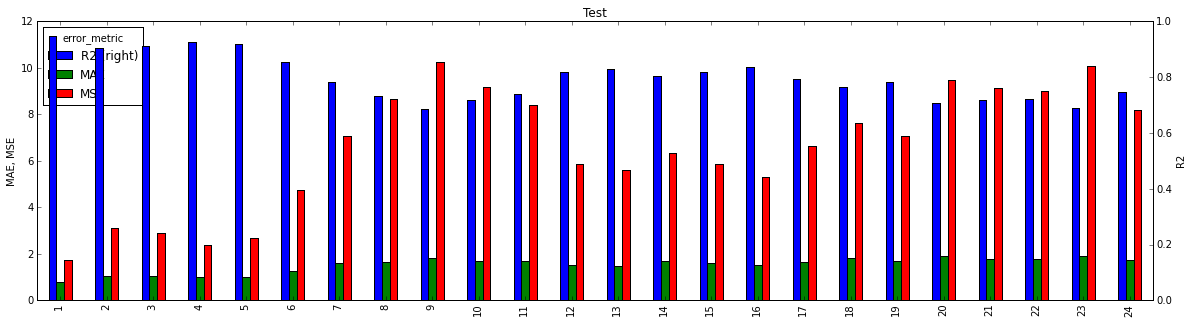

In [147]:
ax = validation_df['all_cols'].iloc[0:24].plot(kind='bar', figsize=(20,5), secondary_y=['R2'], title="Test")
ax.set_ylabel('MAE, MSE')
ax.right_ax.set_ylabel('R2')
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.

## Test the errors with only one prediction model

## Feature Importance

-->Feature set: ALL
-->Feature set: SL_SH_WC_WF
-->Feature set: SL_SH_DT
-->Feature set: WC_WF_DT
-->Feature set: DT


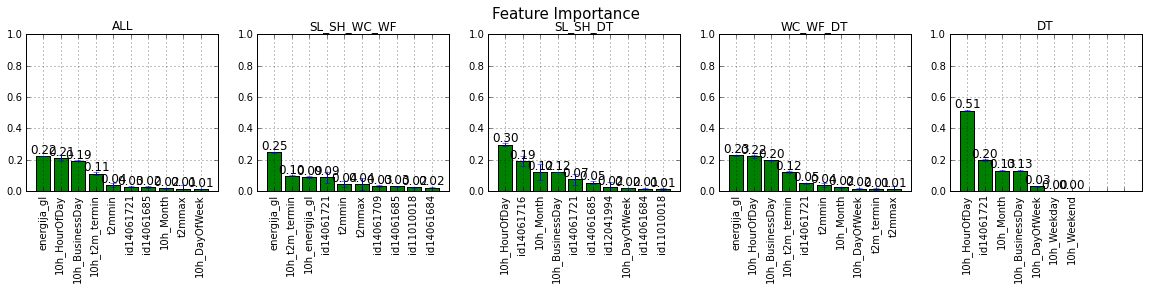

In [35]:
num_of_top_important_ftrs = 10;

fig, axes = plt.subplots(1, len(data_sets))
fig.set_size_inches(20,3)
plt.suptitle('Feature Importance', fontsize=15)
plt.subplots_adjust(top=.85)
plt.setp(axes, xticks=xrange(num_of_top_important_ftrs), xlim = [-1, num_of_top_important_ftrs], ylim=[0, 1])

model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

for idx, data_set in enumerate(data_sets):
    print "-->Feature set:", data_set['name']
    X = data_set['train'].values
    y = target['train'].values.ravel()
    model.fit(X, y)
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:num_of_top_important_ftrs]
    ftr_size = num_of_top_important_ftrs if data_set['train'].shape[1] > num_of_top_important_ftrs else data_set['train'].shape[1] 
    
    for f in range(ftr_size):
        axes[idx].annotate( str("%.2f" % importances[indices[f]]), (f, importances[indices[f]] + 0.02), fontsize=12, ha='center')
    
    # Plot the feature importances of the forest
    axes[idx].set_title(data_set['name'])
    axes[idx].bar(xrange(ftr_size), importances[indices], color="g", yerr=std[indices], align="center")
    axes[idx].set_xticklabels(data_set['train'].columns[indices], rotation='vertical')
    axes[idx].grid(True)

#fig.tight_layout()
plt.show()